<a href="https://colab.research.google.com/github/miguelangel18241/Probabilities/blob/main/Assessment3_DMV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving city_temperature.csv to city_temperature.csv


In [4]:
import pandas as pd

df = pd.read_csv('city_temperature.csv')
# Basic statistics
print(df.describe())

# Group by Region and get statistics
region_stats = df.groupby('Region')['AvgTemperature'].describe()
print(region_stats)

<ipython-input-4-83698200bfd2>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('city_temperature.csv')


              Month           Day          Year  AvgTemperature
count  2.906327e+06  2.906327e+06  2.906327e+06    2.906327e+06
mean   6.469163e+00  1.571682e+01  2.006624e+03    5.600492e+01
std    3.456489e+00  8.800534e+00  2.338226e+01    3.212359e+01
min    1.000000e+00  0.000000e+00  2.000000e+02   -9.900000e+01
25%    3.000000e+00  8.000000e+00  2.001000e+03    4.580000e+01
50%    6.000000e+00  1.600000e+01  2.007000e+03    6.250000e+01
75%    9.000000e+00  2.300000e+01  2.013000e+03    7.550000e+01
max    1.200000e+01  3.100000e+01  2.020000e+03    1.100000e+02
                                       count       mean        std   min  \
Region                                                                     
Africa                              251118.0  53.549517  57.068235 -99.0   
Asia                                316663.0  62.568652  35.655674 -99.0   
Australia/South Pacific              55596.0  61.180869  16.540594 -99.0   
Europe                              381990.0

<ipython-input-6-542c22108e20>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Date'] = pd.to_datetime(city_data[['Year', 'Month', 'Day']])


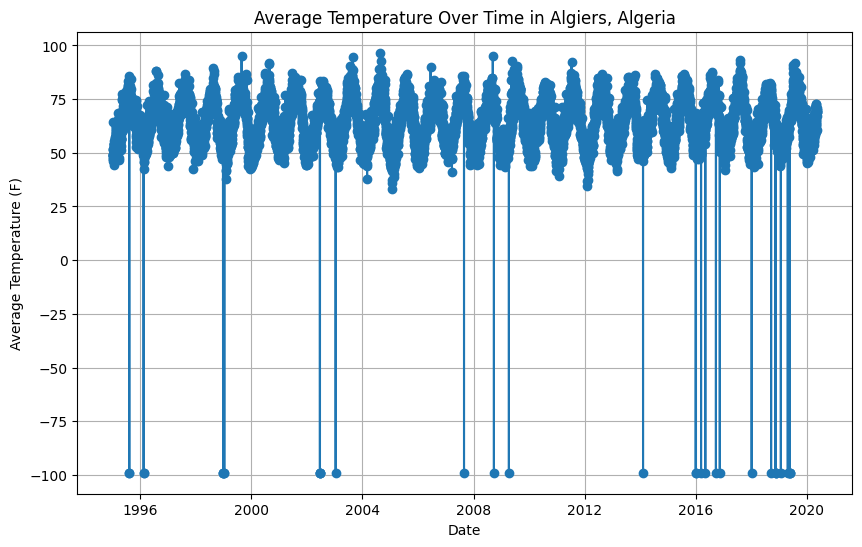

In [6]:
import matplotlib.pyplot as plt

# Filter data for a specific city
city_data = df[(df['Country'] == 'Algeria') & (df['City'] == 'Algiers')]

# Create a datetime column
city_data['Date'] = pd.to_datetime(city_data[['Year', 'Month', 'Day']])

# Plot average temperature over time
plt.figure(figsize=(10, 6))
plt.plot(city_data['Date'], city_data['AvgTemperature'], marker='o')
plt.title('Average Temperature Over Time in Algiers, Algeria')
plt.xlabel('Date')
plt.ylabel('Average Temperature (F)')
plt.grid(True)
plt.show()

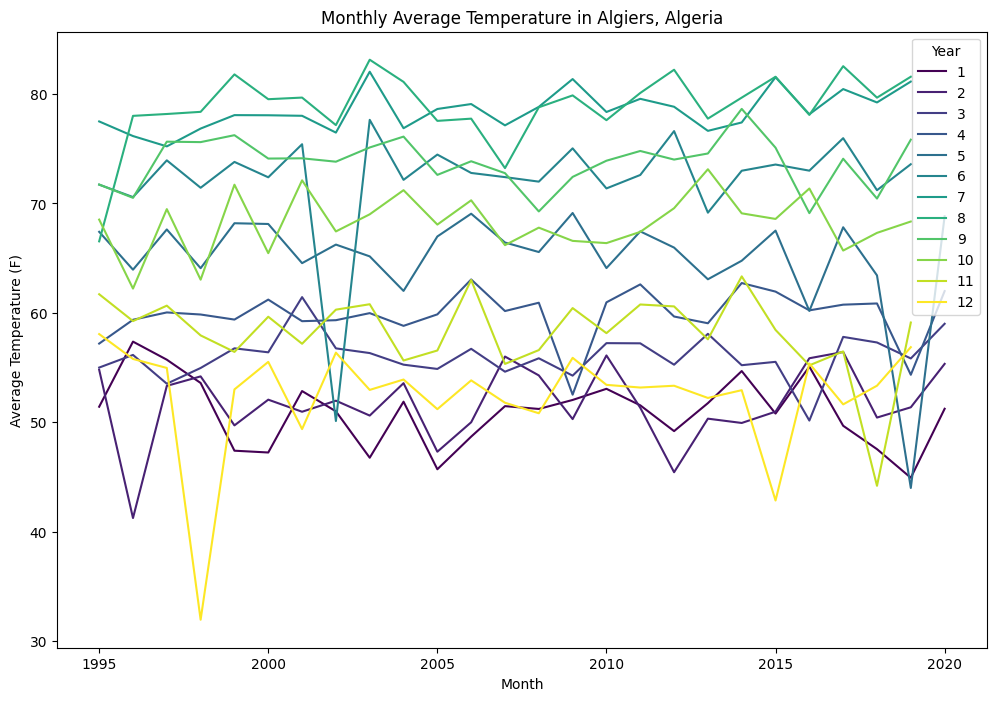

In [7]:

# Filter data for a specific city
city_data = df[(df['Country'] == 'Algeria') & (df['City'] == 'Algiers')]

# Calculate monthly average temperature
monthly_avg_temp = city_data.groupby(['Year', 'Month'])['AvgTemperature'].mean().unstack()

# Plot monthly average temperature
monthly_avg_temp.plot(figsize=(12, 8), cmap='viridis')
plt.title('Monthly Average Temperature in Algiers, Algeria')
plt.xlabel('Month')
plt.ylabel('Average Temperature (F)')
plt.legend(title='Year')
plt.show()

In [8]:

# Check for missing values
print(df.isnull().sum())

# Fill missing values with mean temperature of the respective region
df['AvgTemperature'] = df.groupby('Region')['AvgTemperature'].transform(lambda x: x.fillna(x.mean()))

# Verify that there are no more missing values
print(df.isnull().sum())

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64
Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64


In [9]:

# Convert temperature from Fahrenheit to Celsius
df['AvgTemperatureCelsius'] = (df['AvgTemperature'] - 32) * 5.0/9.0

# Display the first few rows to check the new column
print(df.head())

# Save the updated DataFrame to a new CSV file
df.to_csv('city_temperature_celsius.csv', index=False)

   Region  Country State     City  Month  Day  Year  AvgTemperature  \
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2   
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4   
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8   
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4   
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9   

   AvgTemperatureCelsius  
0              17.888889  
1               9.666667  
2               9.333333  
3               8.000000  
4               8.833333  


Distribution plot for average temperature for all countries


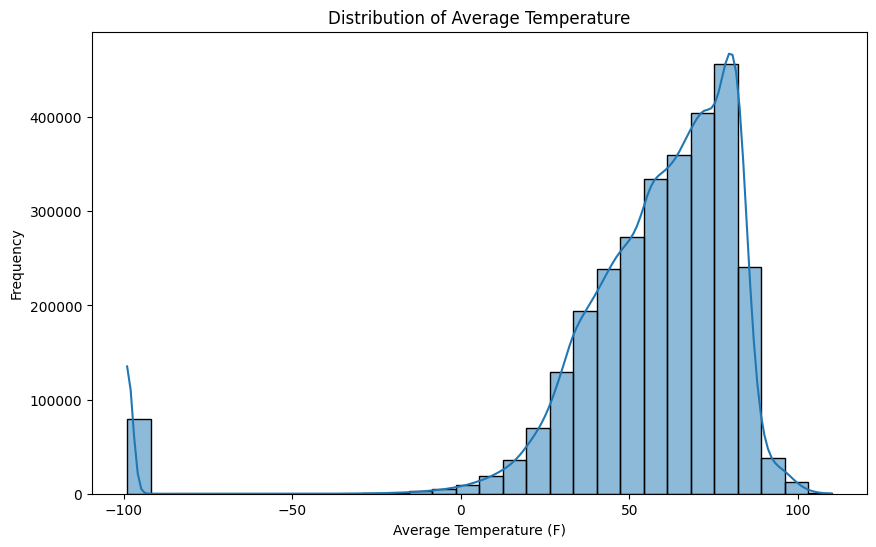

In [11]:
import seaborn as sns

# Distribution plot for average temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['AvgTemperature'], bins=30, kde=True)
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (F)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-db460fd1adbe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_data['Date'] = pd.to_datetime(city_data[['Year', 'Month', 'Day']])


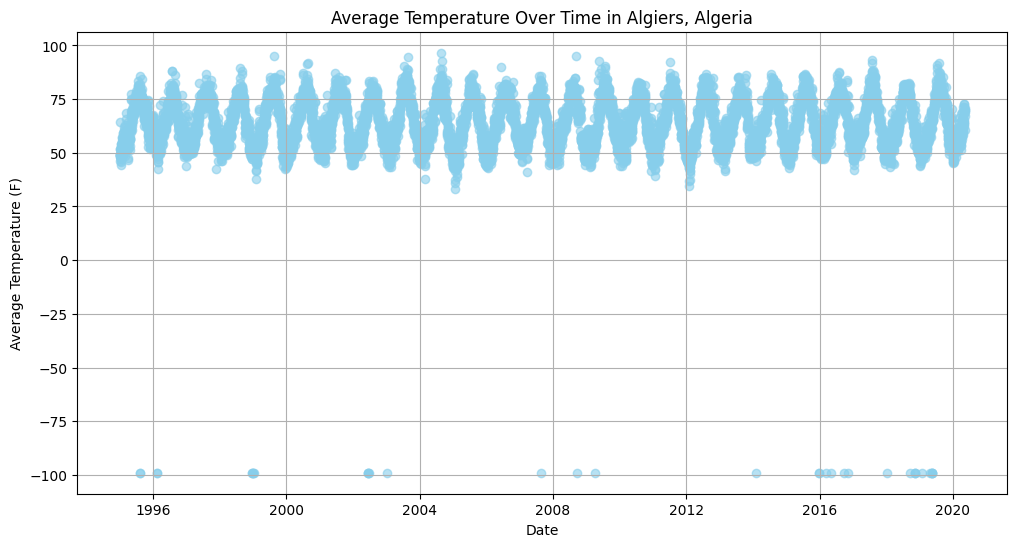

In [14]:

# Filter data for a specific city
city_data = df[(df['Country'] == 'Algeria') & (df['City'] == 'Algiers')]

# Create a datetime column
city_data['Date'] = pd.to_datetime(city_data[['Year', 'Month', 'Day']])

# Scatter plot of average temperature over time
plt.figure(figsize=(12, 6))
plt.scatter(city_data['Date'], city_data['AvgTemperature'], alpha=0.6, color='skyblue')
plt.title('Average Temperature Over Time in Algiers, Algeria')
plt.xlabel('Date')
plt.ylabel('Average Temperature (F)')
plt.grid(True)
plt.show()

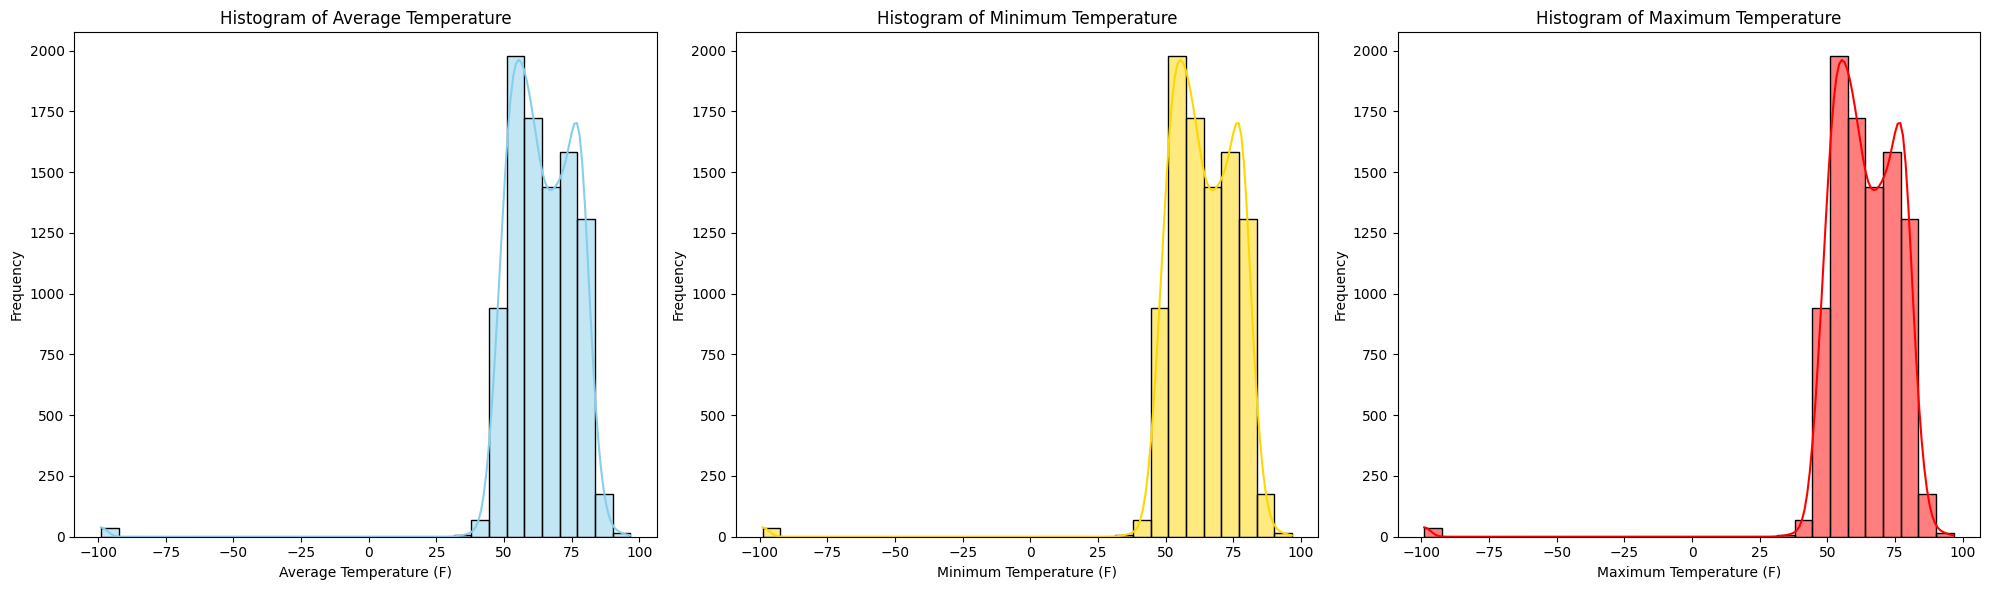

In [15]:

# Create histograms
plt.figure(figsize=(20, 6))

# Histogram for Average Temperature
plt.subplot(1, 3, 1)
sns.histplot(city_data['AvgTemperature'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Average Temperature')
plt.xlabel('Average Temperature (F)')
plt.ylabel('Frequency')

# Histogram for Minimum Temperature (using AvgTemperature as a placeholder)
plt.subplot(1, 3, 2)
sns.histplot(city_data['AvgTemperature'], bins=30, kde=True, color='gold')
plt.title('Histogram of Minimum Temperature')
plt.xlabel('Minimum Temperature (F)')
plt.ylabel('Frequency')

# Histogram for Maximum Temperature (using AvgTemperature as a placeholder)
plt.subplot(1, 3, 3)
sns.histplot(city_data['AvgTemperature'], bins=30, kde=True, color='red')
plt.title('Histogram of Maximum Temperature')
plt.xlabel('Maximum Temperature (F)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
!pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00


Dropdown(description='Country:', options=('Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo', …

Button(description='Search', icon='search', style=ButtonStyle(), tooltip='Click to search')

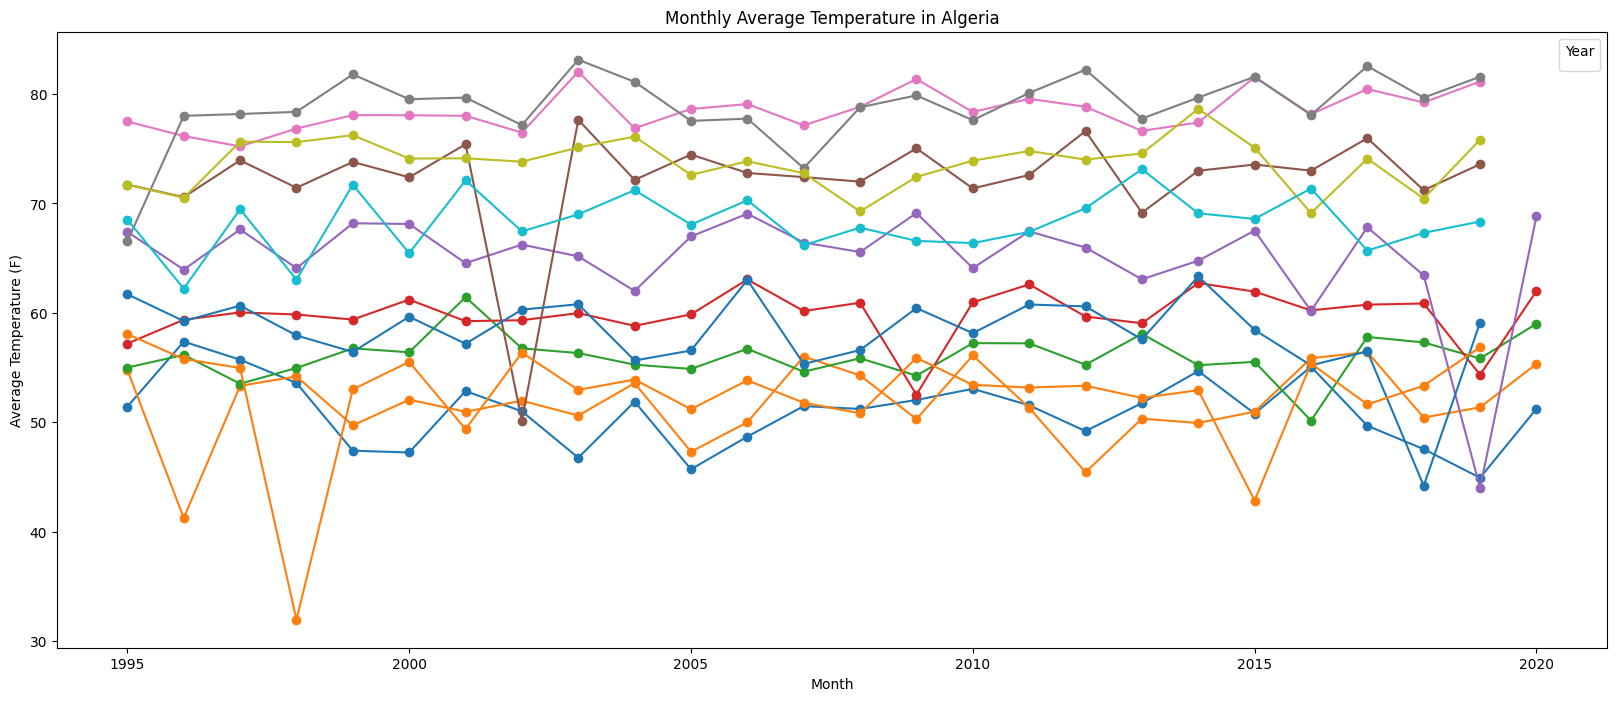

In [21]:
import ipywidgets as widgets
from IPython.display import display, clear_output


# Create a dropdown for selecting a country
countries = df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=countries,
    description='Country:',
    disabled=False,
)

# Create a button for searching
search_button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='',
    tooltip='Click to search',
    icon='search'
)

def plot_temperature(country):
    # Filter data for the selected country
    country_data = df[df['Country'] == country]
    # Further filter for a specific city if needed, or use the whole country data
    # Example: city_data = country_data[country_data['City'] == 'Algiers']

    # Calculate monthly average temperature
    monthly_avg_temp = country_data.groupby(['Year', 'Month'])['AvgTemperature'].mean().unstack()

    # Plot monthly average temperature
    plt.figure(figsize=(20, 8))
    plt.plot(monthly_avg_temp, marker='o')
    plt.title(f'Monthly Average Temperature in {country}')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (F)')
    plt.legend(title='Year')
    plt.show()

# Function to update the plot based on the selected country
def on_button_click(b):
    clear_output(wait=True)
    display(country_dropdown, search_button)
    plot_temperature(country_dropdown.value)

# Set up the button click event
search_button.on_click(on_button_click)

# Display the dropdown and button
display(country_dropdown)
display(search_button)

Dropdown(description='Country:', options=('Algeria', 'Burundi', 'Benin', 'Central African Republic', 'Congo', …

Button(description='Search', icon='search', style=ButtonStyle(), tooltip='Click to search')

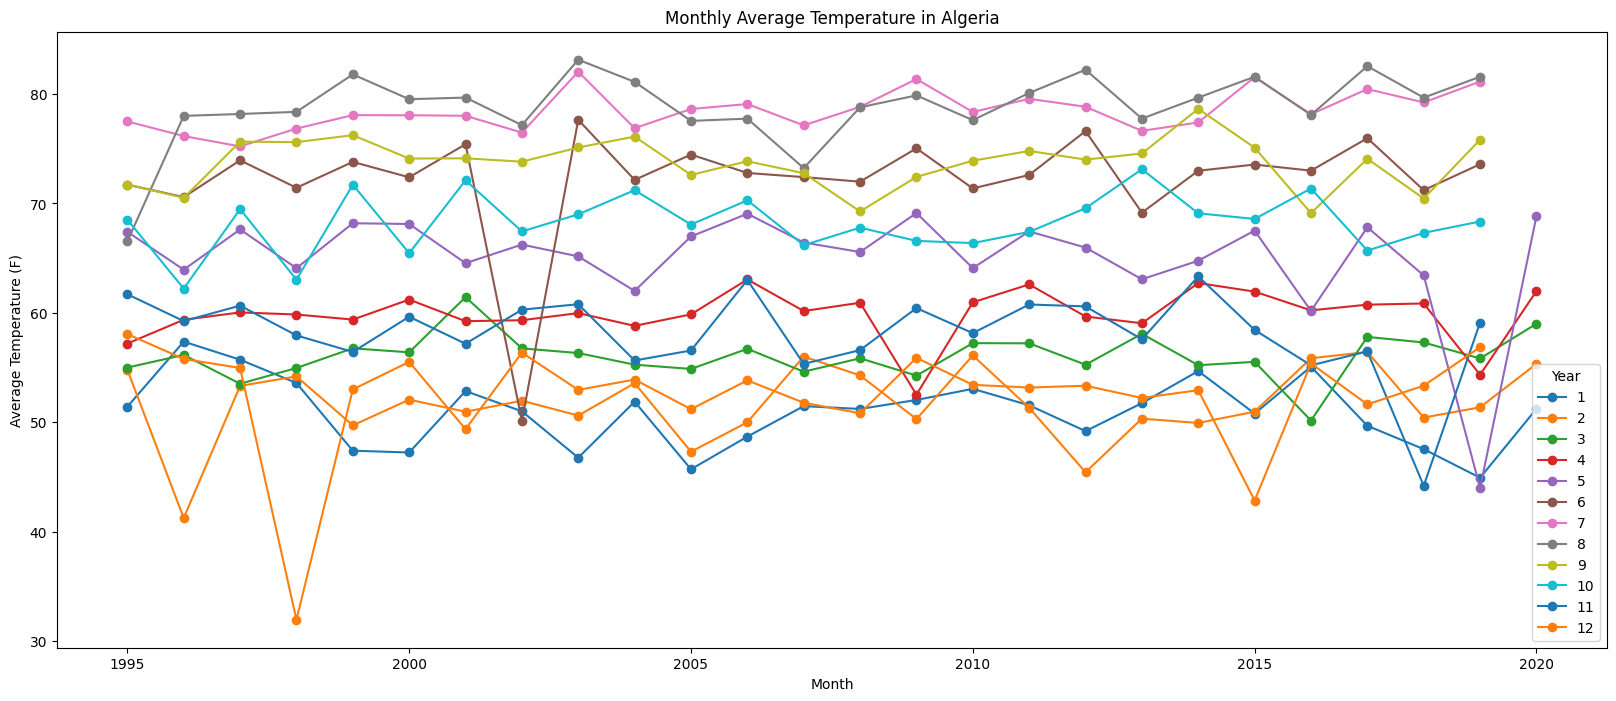

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the data
df = pd.read_csv('city_temperature.csv')

# Create a dropdown for selecting a country
countries = df['Country'].unique()
country_dropdown = widgets.Dropdown(
    options=countries,
    description='Country:',
    disabled=False,
)

# Create a button for searching
search_button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='',
    tooltip='Click to search',
    icon='search'
)

def plot_temperature(country):
    # Filter data for the selected country
    country_data = df[df['Country'] == country]

    # Calculate monthly average temperature
    monthly_avg_temp = country_data.groupby(['Year', 'Month'])['AvgTemperature'].mean().unstack()

    # Plot monthly average temperature
    plt.figure(figsize=(20, 8))
    for year in monthly_avg_temp.columns:
        plt.plot(monthly_avg_temp.index, monthly_avg_temp[year], marker='o', label=str(year))
    plt.title(f'Monthly Average Temperature in {country}')
    plt.xlabel('Month')
    plt.ylabel('Average Temperature (F)')
    plt.legend(title='Year')
    plt.show()

# Function to update the plot based on the selected country
def on_button_click(b):
    clear_output(wait=True)
    display(country_dropdown, search_button)
    plot_temperature(country_dropdown.value)

# Set up the button click event
search_button.on_click(on_button_click)

# Display the dropdown and button
display(country_dropdown)
display(search_button)
